In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv('../data/sales_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
ctg_feats = ['Channel', 'Region']  # 비연속적 (순서가 의미 없는) 명목형 데이터
cont_feats = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']  # 연속적 (순서가 의미 있는) 수치형 데이터

for col in ctg_feats:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [10]:
mms = MinMaxScaler()  # 0~1 사이로 정규화
mms.fit(data)  # fit은 학습을 의미하는 것이 아니라, 데이터의 통계치를 계산하는 것임 가끔 혼용하는 사람이 있음

data_transformed = mms.transform(data)

In [11]:
sum_of_squared_distances = []
k = range(1, 15)
for i in k:
    km = KMeans(n_clusters=i,
                n_init=10)  # Don't change logging level env var for ignoring warning, just written explicitly (n_init=10)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

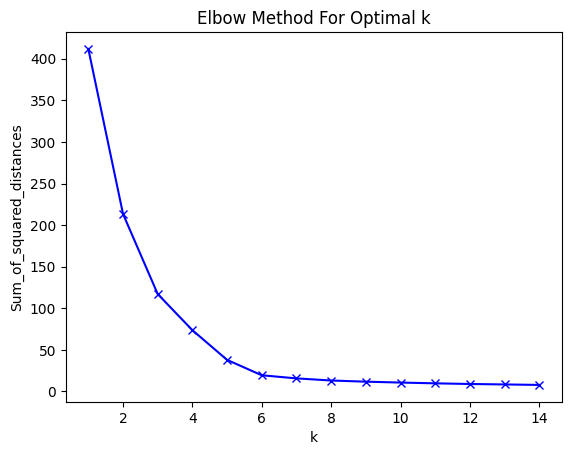

In [12]:
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

plt.show()  # We can see the same result without change environment variable